In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cf
from sklearn.cross_validation import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Partitioning data to input and target variable

In [4]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

train_pts = train_data.drop('Activity', axis=1)
train_labels = train_data['Activity']

test_pts = test_data.drop('Activity', axis=1)
test_labels = test_data['Activity']

## Classifying after applying PCA

In [5]:
pca = PCA(n_components=200)
train_pca = pca.fit_transform(train_pts, y=train_labels)
# print(pca.explained_variance_ratio_)
test_pca = pca.transform(test_pts)
print(pca.explained_variance_ratio_.sum())

# variance = []
# variance[0] = pca.explained_variance_raio_[0]
# print variance[0]
# for i in range(0,200):
#     variance[i]
    

0.998059864675


In [22]:
clf = KNeighborsClassifier(n_neighbors=29)
clf.fit(train_pts, train_labels)
scores = clf.score(test_pts, test_labels)
print scores
print clf

0.812012215813
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=29, p=2,
           weights='uniform')


In [23]:
def plot_confusion(classifier, test_pts, test_labels):
    classes = ['STANDING',
               'SITTING',
               'LAYING',
               'WALKING',
               'WALKING_DOWNSTAIRS',
               'WALKING_UPSTAIRS']
    pred_label = classifier.predict(test_pts)
    # print(true_label)
    result = cf(test_labels, pred_label, labels=classes)
    res_nor = np.ndarray((6, 6), dtype=float)
    for i in range(0, 6):
        s = result[i].sum()
        for j in range(0, 6):
            res_nor[i][j] = float(result[i][j] / s)
    print(result)
    print(res_nor)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(result)
    # plt.matshow(result)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + classes)
    ax.set_yticklabels([''] + classes)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.legend(loc='best')
    plt.show()

[[480  51   0   1   0   0]
 [154 334   0   0   0   3]
 [  4  20 512   0   0   1]
 [  0   0   0 448  29  19]
 [  0   0   0  89 288  43]
 [  0   0   0 123  17 331]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


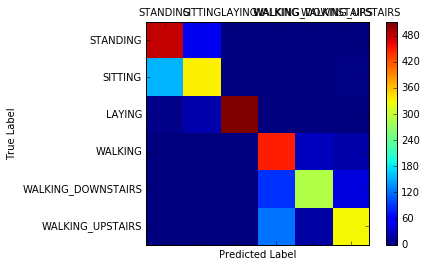

In [21]:
plot_confusion(clf, test_pts, test_labels)

## Random Forest Classifier

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [24]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
scores = []
for n in range(10,300,10):
    rf = RandomForestClassifier(n_estimators=n,  n_jobs=4, min_samples_leaf=10)    
    rf.fit(train_pca, train_labels)
    scores.append(rf.score(test_pca,test_labels))

print scores


[0.84458771632168306, 0.88123515439429934, 0.88123515439429934, 0.88394977943671527, 0.8961655921275874, 0.90125551408211746, 0.8982015609093994, 0.89888021717000344, 0.89243298269426541, 0.90159484221241937, 0.90600610790634539, 0.90329148286392946, 0.90261282660332542, 0.89989820156090938, 0.90498812351543945, 0.90430946725483541, 0.90125551408211746, 0.90430946725483541, 0.90227349847302341, 0.90532745164574147, 0.90566677977604348, 0.90091618595181544, 0.90091618595181544, 0.90736342042755347, 0.90329148286392946, 0.90634543603664741, 0.90566677977604348, 0.90397013912453339, 0.90770274855785549]


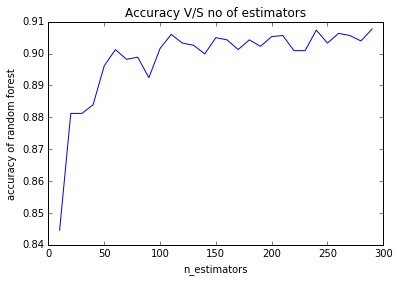

In [25]:
n_estim = list(range(10,300,10))
plt.plot(n_estim, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy of random forest")
plt.title("Accuracy V/S no of estimators")
plt.legend(loc='best')
plt.show()

[[486  46   0   0   0   0]
 [ 77 409   5   0   0   0]
 [  0   0 537   0   0   0]
 [  0   0   0 478  18   0]
 [  0   0   0  50 337  33]
 [  0   0   0  29  14 428]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


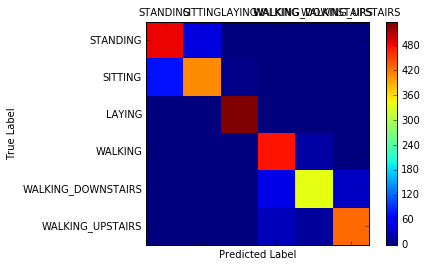

In [26]:
classes = ['STANDING',
           'SITTING',
           'LAYING',
           'WALKING',
           'WALKING_DOWNSTAIRS',
           'WALKING_UPSTAIRS']
pred_label = rf.predict(test_pca)
# print(true_label)
result = cf(test_labels, pred_label, labels=classes)
res_nor = np.ndarray((6, 6), dtype=float)
for i in range(0, 6):
    s = result[i].sum()
    for j in range(0, 6):
        res_nor[i][j] = float(result[i][j] / s)
print(result)
print(res_nor)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(result)
# plt.matshow(result)
fig.colorbar(cax)
ax.set_xticklabels([''] + classes)
ax.set_yticklabels([''] + classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.legend(loc='best')
plt.show()

In [6]:
 k_range = list(range(1, 31,2))
k_scores_train = []
# k_scores_test = []
# k_scores_cv_train = []
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_pca, train_labels)
    scores_train = clf.score(train_pca, train_labels)
    k_scores_train.append(scores_train)
#     scores_test = clf.score(test, test_labels)
#     k_scores_test.append(scores_test)
#     scores_cv_train = cross_val_score(clf, train, train_labels, cv=100, scoring='accuracy')
#     k_scores_cv_train.append(scores_cv_train.mean())

In [7]:
print k_scores_train

[1.0, 0.99605549510337321, 0.98884657236126228, 0.98408596300326445, 0.97959738846572364, 0.97687704026115341, 0.97293253536452662, 0.97089227421109903, 0.96735582154515776, 0.96341131664853097, 0.96300326441784545, 0.96123503808487487, 0.96041893362350383, 0.95797062023939061, 0.95633841131664854]


In [8]:
k_range = list(range(1, 31,2))
k_scores_train = []
k_scores_test = []
k_scores_cv_train = []
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_pca, train_labels)
#     scores_train = clf.score(train_pts, train_labels)
#     k_scores_train.append(scores_train)
    scores_test = clf.score(test_pca, test_labels)
    k_scores_test.append(scores_test)
#     scores_cv_train = cross_val_score(clf, train, train_labels, cv=100, scoring='accuracy')
#     k_scores_cv_train.append(scores_cv_train.mean())

In [9]:
print k_scores_test

[0.79776043434000676, 0.80624363759755679, 0.80997624703087889, 0.80760095011876487, 0.80794027824906689, 0.8120122158126909, 0.81235154394299292, 0.81336952833389886, 0.8140481845945029, 0.81506616898540885, 0.81167288768238888, 0.81574482524601288, 0.8160841533763149, 0.81506616898540885, 0.81336952833389886]


In [ ]:
k_range = list(range(1, 31,2))
# k_scores_train = []
# k_scores_test = []
k_scores_cv_train = []
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(train_pts, train_labels)
#     scores_train = clf.score(train_pts, train_labels)
#     k_scores_train.append(scores_train)
#     scores_test = clf.score(test_pts, test_labels)
#     k_scores_test.append(scores_test)
    scores_cv_train = cross_val_score(clf, train_pca, train_labels, cv=700, scoring='accuracy')
    k_scores_cv_train.append(scores_cv_train.mean())

In [ ]:
print k_scores_cv_train